<font color = 'purple'>**PROJECT DESCRIPTION**</font>

You are an analyst at a big online store. Together with the marketing
department, you've compiled a list of hypotheses that may help boost
revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the
results

# Table of contents
1. [Part 1. Prioritizing Hypotheses](#step1)
2. [Part 2. A/B Test Analysis](#step2)


## Part 1. Prioritizing Hypotheses <a name= "step1"> </a>

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 400)
hypotheses = pd.read_csv('https://code.s3.yandex.net/datasets/hypotheses_us.csv', sep=';')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [2]:
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

In [3]:
hypotheses['ice'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

In [6]:
hypotheses['rice'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

<font color = 'purple'>Conclusion 
    
With Ice prioritization leading hypotheses are 8 and 0
    
But we can see that Reach parameter is changing the prioritization of hypotheses and leading are 7 and 2 which have the top reach values, so we have to take in account that more users will be affected by changes 

## Part 2. A/B Test Analysis <a name= "step1"> </a>

<font color = 'purple'>Preparing our data

In [3]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_us.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [10]:
orders.columns = orders.columns.str.lower()
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [11]:
orders.isnull().sum()

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
orders.duplicated().sum()

0

In [13]:
orders['visitorid'].nunique()

1031

<font color ='purple'>Now we have to check and get rid of for customers who might accidently assigned to both test groups

In [14]:
orders_twogroups = orders.groupby('visitorid').agg({'group':'nunique'}).reset_index().query('group >1')
orders_twogroups.head()

,visitorid,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [15]:
orders_twogroups.shape

(58, 2)

In [16]:
orders_twogroups = orders_twogroups.rename(columns = {'group':'twogroups'})

In [17]:
orders_clean = orders.merge(orders_twogroups, on = 'visitorid', how = 'left')
orders_clean.head()

,transactionid,visitorid,date,revenue,group,twogroups
0,3667963787,3312258926,2019-08-15,30.4,B,NaN
1,2804400009,3642806036,2019-08-15,15.2,B,NaN
2,2961555356,4069496402,2019-08-15,10.2,A,2.0
3,3797467345,1196621759,2019-08-15,155.1,B,NaN
4,2282983706,2322279887,2019-08-15,40.5,B,NaN


In [18]:
orders_clean = orders_clean.query('"2.0" not in twogroups')
orders_clean.shape

(1016, 6)

In [19]:
orders_clean['visitorid'].nunique()

973

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
orders_clean.drop('twogroups', axis = 1, inplace = True)

In [22]:
orders_clean.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [23]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [24]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [25]:
visits.duplicated().sum()

0

In [26]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Analyze the A/B test:**

- **Graph cumulative revenue by group. Make conclusions and conjectures**

In [27]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

orders_clean['date'] = orders_clean['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))



In [28]:
datesGroups = orders_clean[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [29]:
ordersAggregated = datesGroups.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [30]:
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [31]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

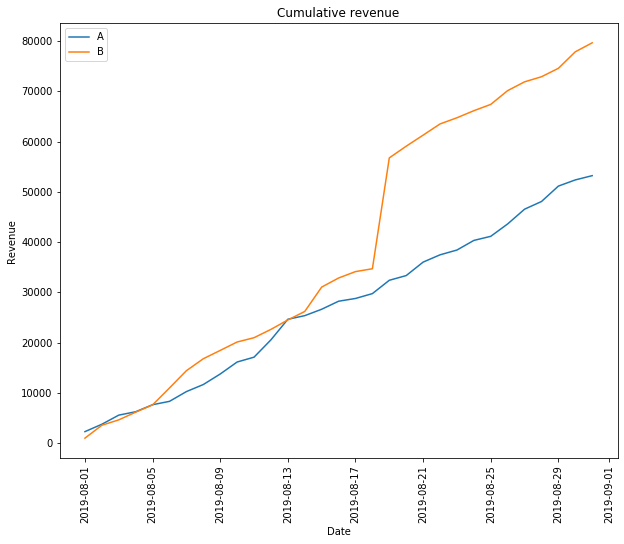

In [33]:
plt.figure(figsize=(10,8))
plt.title('Cumulative revenue')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Revenue')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

<font color = 'purple'>Revenue is rising steadily throughout the whole test for both groups, but group B have some peak points of growing. We need to investigate more 

- **Graph cumulative average order size by group. Make conclusions and
conjectures**

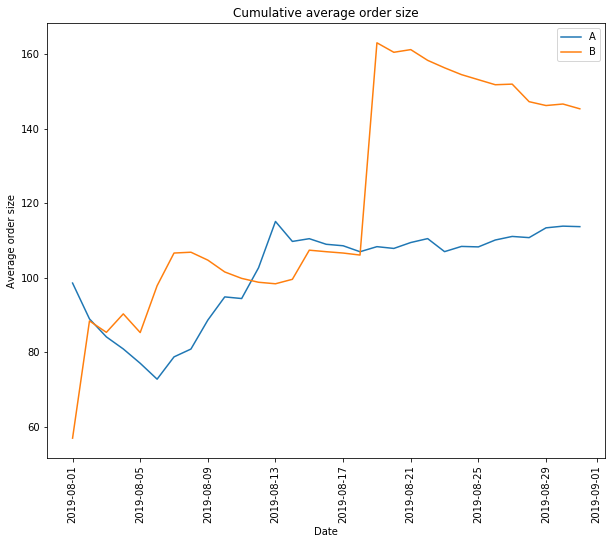

In [34]:
plt.figure(figsize=(10,8))
plt.title('Cumulative average order size')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Average order size')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

<font color = 'purple'>Average order size becomes steady by the end of the test: it stabilizes for group A and keeps on falling for group B. The surge in group B may have been due to the presence of large, expensive orders. We need more data on this group to find the true average purchase size and establish its level

- **Graph the relative difference in cumulative average order size for group B
compared with group A. Make conclusions and conjectures**

In [35]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


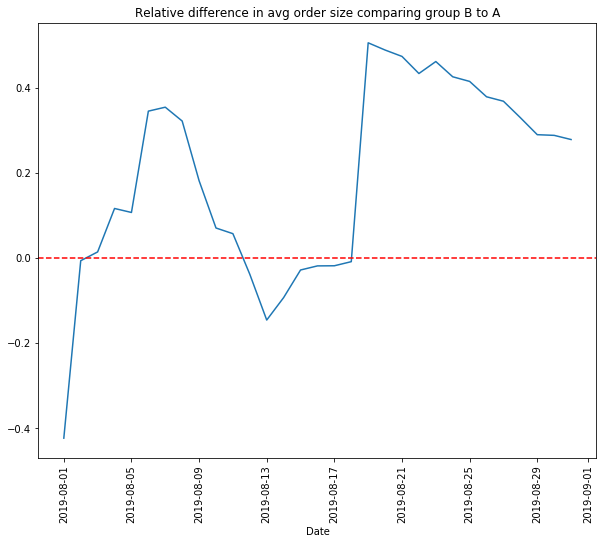

In [36]:
plt.figure(figsize=(10,8))
plt.title('Relative difference in avg order size comparing group B to A')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle='--');

<font color = 'purple'>At several points the difference between the segments spikes. We should check for some big orders and outliers

- **Calculate each group's conversion rate as the ratio of orders to the
number of visits for each day. Plot the daily conversion rates of the two
groups and describe the difference. Draw conclusions and make
conjectures**

In [37]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [38]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

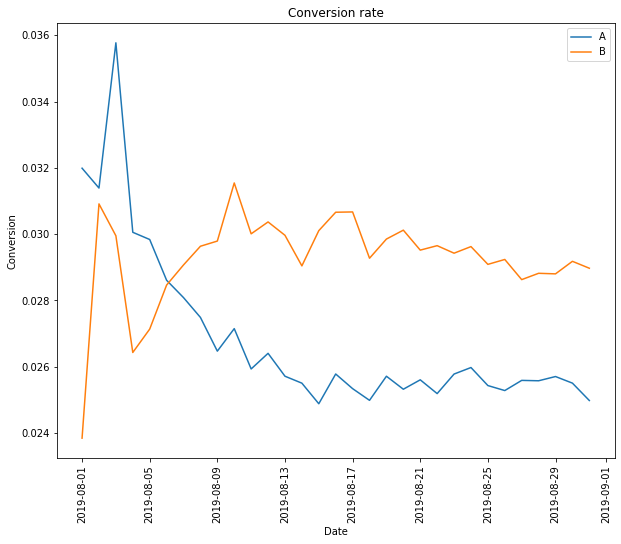

In [39]:
plt.figure(figsize=(10,8))
plt.title('Conversion rate')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.ylabel('Conversion')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

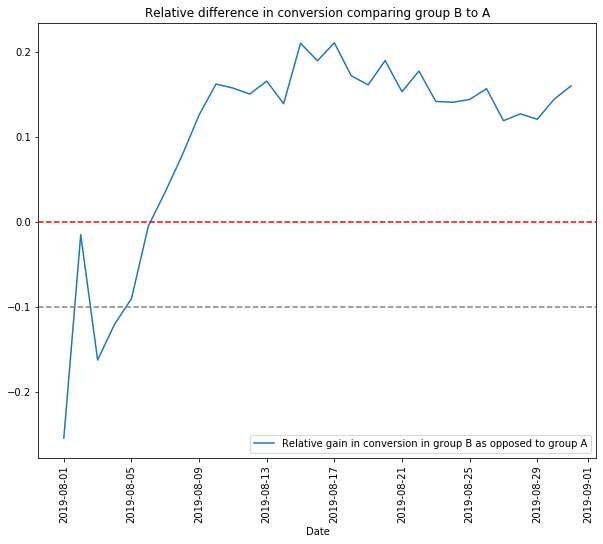

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(10,8))
plt.title('Relative difference in conversion comparing group B to A')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');


<font color = 'purple'>We can see that in the beggining of the test both groups showed fast rise and then went down, but Group A conversion first week went down dramatically, then stabilized  on that level and then went down again on 28th day which is normal. For Group B conversion 4th to 11th day went up and stabilized on that level 
    
At the relative difference graph we can see at the beginning of the test, group B was lagging behind noticeably, but then it suddenly took the lead and didnt stop growing when we know that group A was going down dramatically

- **Plot a scatter chart of the number of orders per user. Make conclusions
and conjectures**

In [41]:
ordersByUsers = orders_clean.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [42]:
ordersByUsers['orders'].value_counts()

1    937
2     29
3      7
Name: orders, dtype: int64

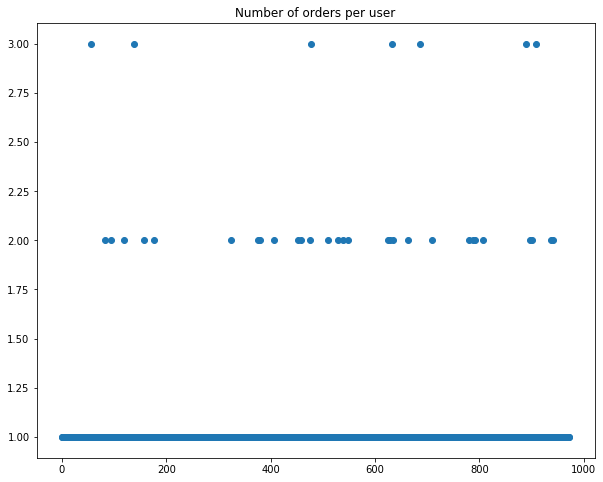

In [43]:
plt.figure(figsize=(10,8))
plt.title('Number of orders per user')

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) ;

<font color = 'purple'>The majority of customers placed only one order, some 2 orders and just few 3 orders

- **Calculate the 95th and 99th percentiles for the number of orders per user.
Define the point at which a data point becomes an anomaly**

In [44]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

<font color = 'purple'>Not more then 1% of customers placed 2 orders. 3 orders are definetely abnormal

- **Plot a scatter chart of order prices. Make conclusions and conjectures**

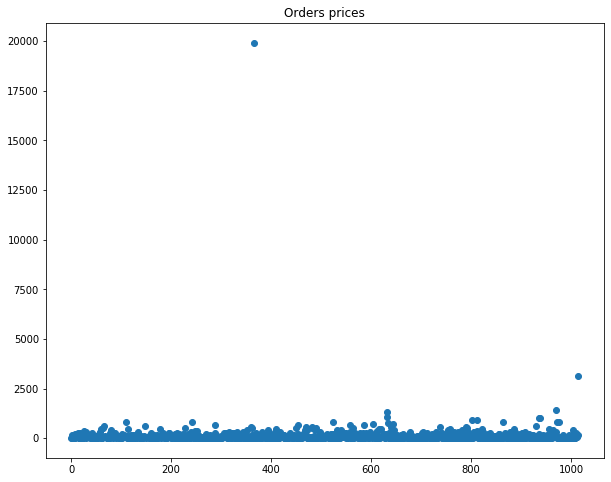

In [45]:
plt.figure(figsize=(10,8))
plt.title('Orders prices')

x_values = pd.Series(range(0, len(orders_clean['revenue'])))
plt.scatter(x_values, orders_clean['revenue']) ;

<font color = 'purple'>Most orders are low priced. There are just few big orders. Based on the graph, we can see 2500 and 20000

- **Calculate the 95th and 99th percentiles of order prices. Define the point at
which a data point becomes an anomaly**

In [46]:
np.percentile(orders_clean['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

<font color = 'purple'>Not more than 5% of orders cost more than 414, and not more than 1% cost more than 830

- **Find the statistical significance of the difference in conversion between the
groups using the raw data. Make conclusions and conjectures**

In [47]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [48]:
ordersByUsersA.head()

,visitorid,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [49]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

<div class="alert alert-info"> <b>Student's comment:</b> H0 hypotheses is - there's not a statistically significant difference in conversion between the groups. H1 hypotheses is - there is a statistically significant difference in conversion between the groups. Alpha level - 0.05</div>

In [50]:
import scipy.stats as stats

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


<font color = 'purple'>We created the variables ordersByUsersA and ordersByUsersB to store  the number of orders made by each user and declared the variables sampleA and sampleB, with stores a sample where each element is the number of orders made by a certain user, including zeroes. Then we used mannwhitneyu() criterion.

The first row of the output gives us the p-value, 0.008, which is less than 0.05. So we reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. But the relative conversion gain for group B: group B conversion / group A conversion - 1 is 13.8% (the second row of the output).
    
Conclusion: based on the raw data, there is a difference in conversion between groups A and B

- **Find the statistical significance of the difference in average order size
between the groups using the raw data. Make conclusions and conjectures**

<div class="alert alert-info"> <b>Student's comment:</b> H0 hypotheses is - there's not a statistically significant difference in average order size between the groups. H1 hypotheses is - there is a statistically significant difference in average order size between the groups. Alpha level - 0.05</div>

In [51]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.346
0.252


<font color = 'purple'>The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups, nonetheless the average order size for group B is larger than it is for group A 
Conclusion: based on the raw data, there is no difference in average order size between groups A and B

- **Find the statistical significance of the difference in conversion and the statistical significance of the difference in average order size between the
groups using the filtered data. Make conclusions and conjectures**

<div class="alert alert-info"> <b>Student's comment:</b> H0 hypotheses is - there's not a statistically significant difference in conversion between the groups ( filtered data). H1 hypotheses is - there is a statistically significant difference in conversion between the groups. Alpha level - 0.05</div>

In [52]:
usersWithExpensiveOrders = orders[orders['revenue'] > 830]['visitorid']
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid']], axis = 0)
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorid, dtype: int64

In [53]:
abnormalUsers.shape

(34,)

In [54]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [55]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.005
0.177


<div class="alert alert-info"> <b>Student's comment:</b> H0 hypotheses is - there's not a statistically significant difference in average order size between the groups ( filtered data). H1 hypotheses is - there is a statistically significant difference in average order size between the groups. Alpha level - 0.05</div>

In [56]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.448
-0.003


<font color = 'purple'>We defined anomalous users as those who place more than 2 orders or one order bigger than 2000. We made data slices with the users who placed more than 2 orders (usersWithManyOrders) and the users who placed orders for more than 2000 (usersWithExpensiveOrders). We joined them in a table called abnormalUsers. We have 34 anomalous users in total and prepared samples of the number of orders per user for each test group. Then again applied the statistical Mann-Whitney criterion to the resulting samples and we can see results for conversion  increased a bit, also with average order size we see that p-value increased a bit and the average order size for group B is smaller than it is for group A. Although our general conclusions from the test didn't change, the anomalies did not change the picture

**Conclusion**

**Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups, but there was revealed statistically significant differences in conversion between two groups. In general, the conversion ratio looks stable, so we can draw conclusions about the test that group B is a leader and stop the test**

